<Axes: title={'center': 'Commits per hour'}, xlabel='hour'>

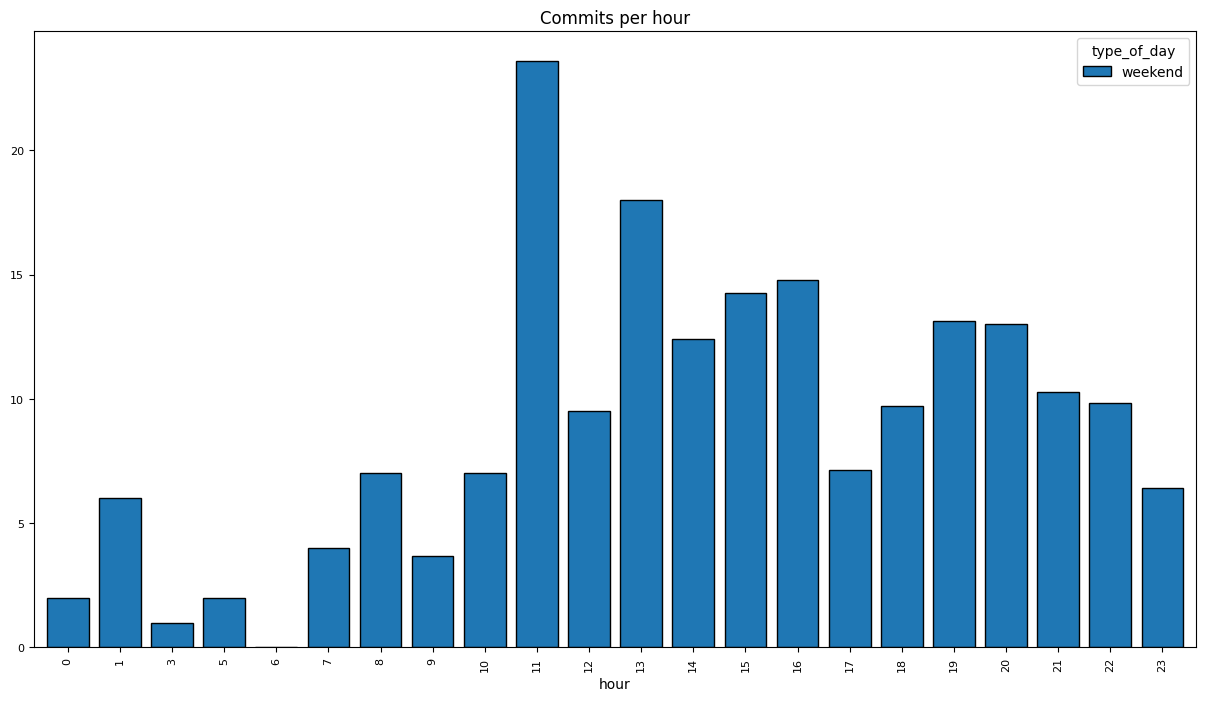

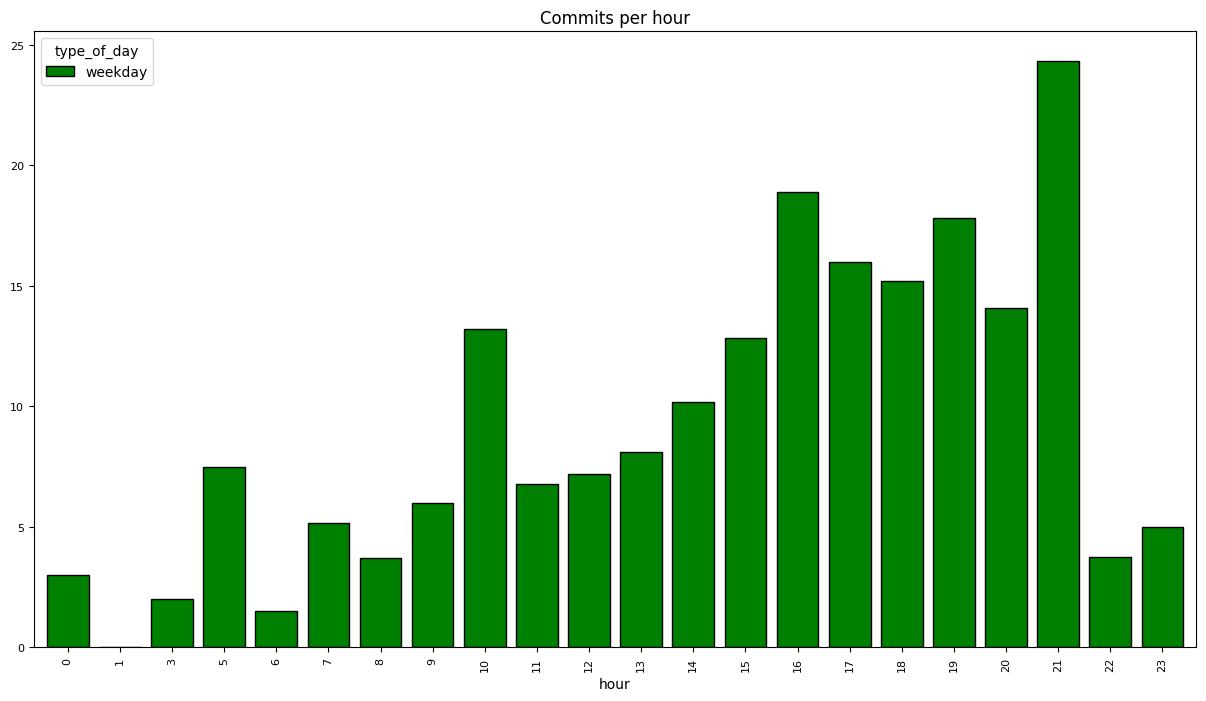

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../../datasets/data/checking-logs.sqlite')

query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
df = pd.read_sql(query, conn)
conn.close()

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['day_of_week'] = df['timestamp'].dt.dayofweek

def get_type_of_day(day_of_week):
    if day_of_week < 5:
        return 'weekday'
    else:
        return 'weekend'

df['type_of_day'] = df['day_of_week'].apply(get_type_of_day)

commits_per_hour = df.groupby(['type_of_day', 'date', 'hour']).size().reset_index(name='commits')
avg_commits = commits_per_hour.groupby(['type_of_day', 'hour'])['commits'].mean().reset_index()

pivot_df = avg_commits.pivot(index='hour', columns='type_of_day', values='commits').fillna(0)

pivot_df_weekday = pivot_df[['weekday']].dropna()
pivot_df_weekend = pivot_df[['weekend']].dropna()

pivot_df_weekend.plot(
    kind='bar',
    stacked=False,
    figsize=(15, 8),
    fontsize=8,
    title='Commits per hour',
    edgecolor='black',
    width=0.8
)

pivot_df_weekday.plot(
    kind='bar',
    stacked=False,
    figsize=(15, 8),
    fontsize=8,
    title='Commits per hour',
    color='green',
    edgecolor='black',
    width=0.8
)

Is the dynamic different on working days and weekends?

21 in the working day and 11 in the weekend